# Projet Machine Learning : Prédiction de l'émission de CO2

In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
data = read.csv("global-data-on-sustainable-energy (1).csv")

In [3]:
head(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


# Analyse exploratoire des données

In [4]:
str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

## Convertir Year en une variable qualitative

In [5]:
data$Year = as.factor(data$Year)

## Convertir Density en une variable numérique

In [6]:
data$Density.n.P.Km2. = as.numeric(gsub(",",".",data$Density.n.P.Km2.))

## Determiner le taux de valeurs manquantes

### Taux de valeurs manquantes total

In [7]:
sum(is.na(data))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [8]:
tx = sapply(data, function(x) sum(is.na(x))*100/(21*3649))
print(tx)

                                                          Entity 
                                                     0.000000000 
                                                            Year 
                                                     0.000000000 
                         Access.to.electricity....of.population. 
                                                     0.013049890 
                               Access.to.clean.fuels.for.cooking 
                                                     0.220543136 
            Renewable.electricity.generating.capacity.per.capita 
                                                     1.214944734 
                  Financial.flows.to.developing.countries..US... 
                                                     2.726121964 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                     0.253167861 
                             Electricity.from.fossil.fuels..TWh. 
          

In [9]:
data$Renewable.electricity.generating.capacity.per.capita = NULL
data$Financial.flows.to.developing.countries..US...= NULL
data$Renewables....equivalent.primary.energy. = NULL

In [10]:
complete_data = na.omit(data)
summary(complete_data)

    Entity               Year      Access.to.electricity....of.population.
 Length:2868        2014   : 147   Min.   :  1.252                        
 Class :character   2015   : 147   1st Qu.: 53.238                        
 Mode  :character   2016   : 146   Median : 97.000                        
                    2017   : 146   Mean   : 76.585                        
                    2018   : 146   3rd Qu.:100.000                        
                    2019   : 146   Max.   :100.000                        
                    (Other):1990                                          
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 22.07                   
 Median : 81.55                   
 Mean   : 62.17                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
                                  
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   : 0.000                                       

In [11]:
str(complete_data)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low.carbon.electricity....e

## Analyse descriptive unidimensionnelle

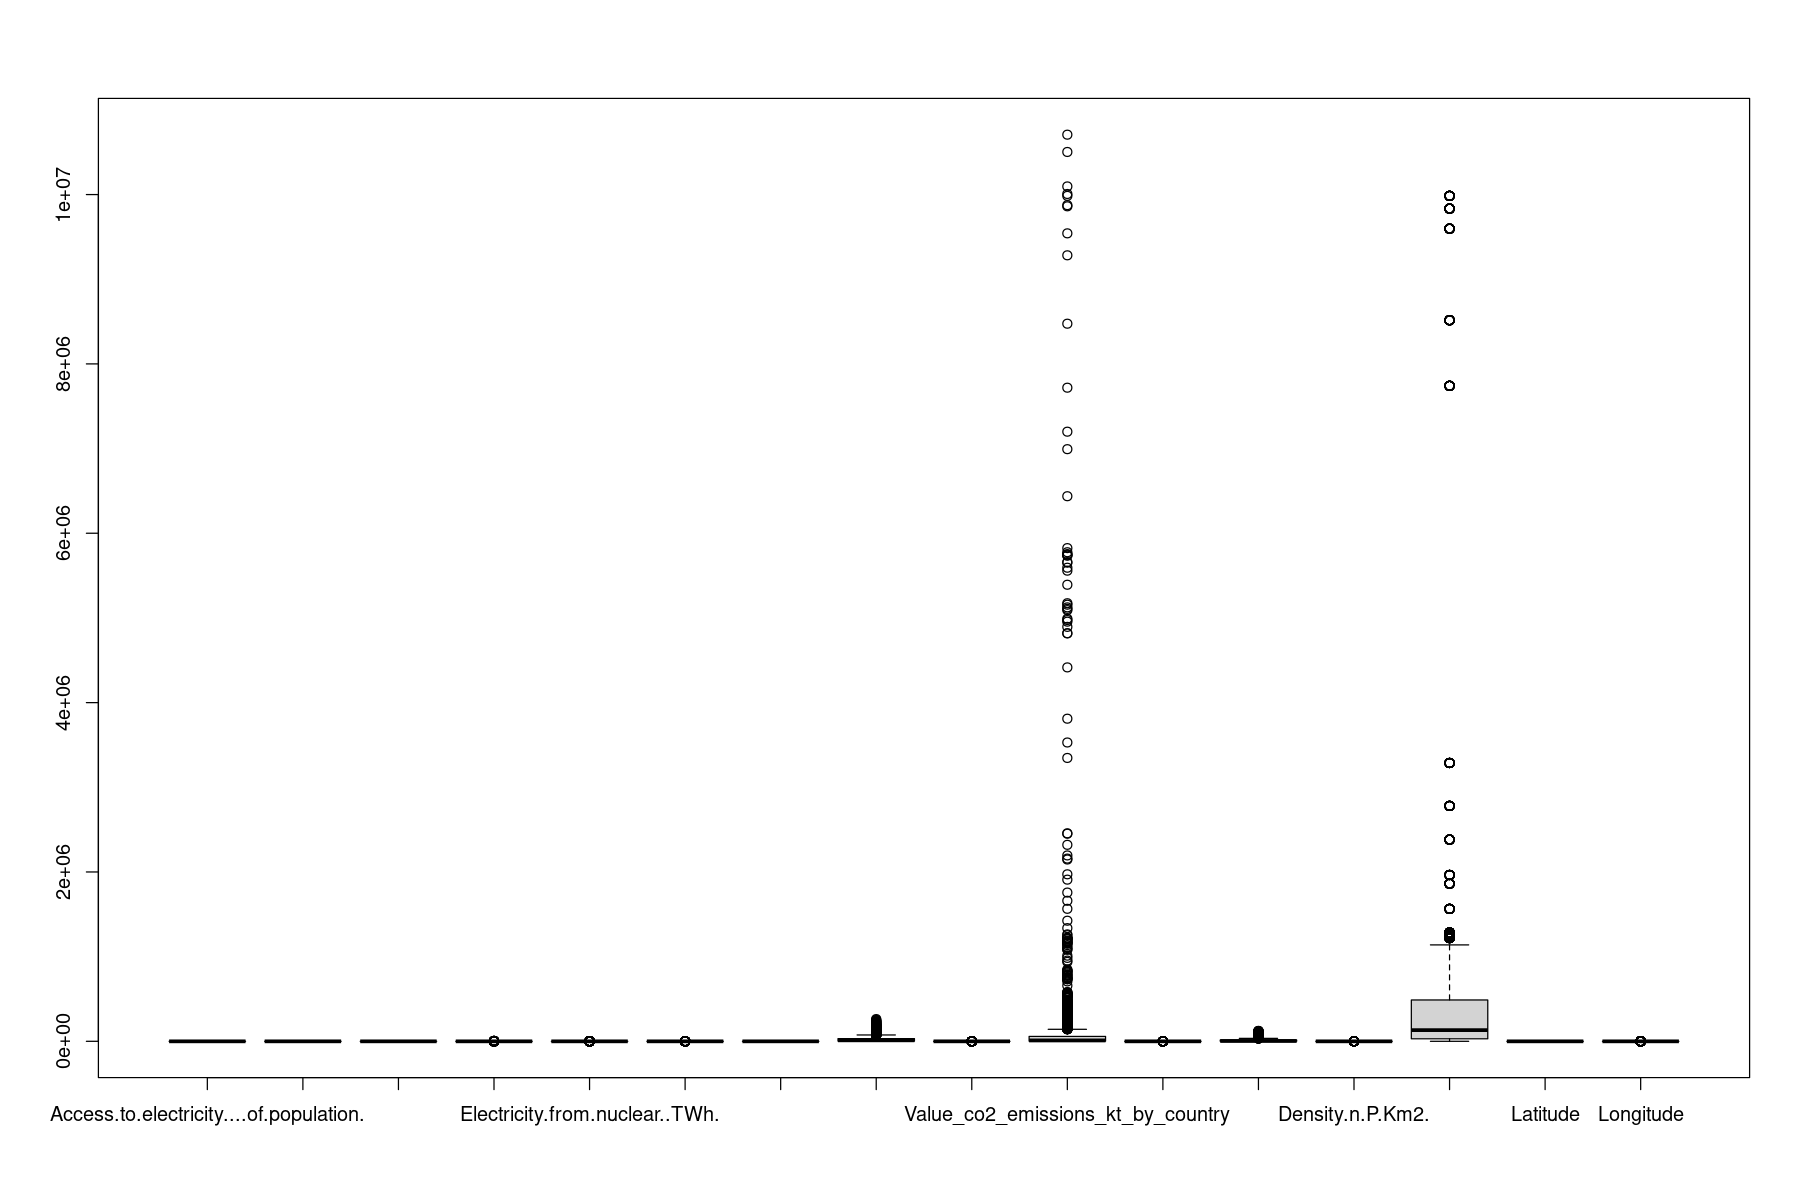

In [12]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_data[,-c(1,2)]
boxplot(df)

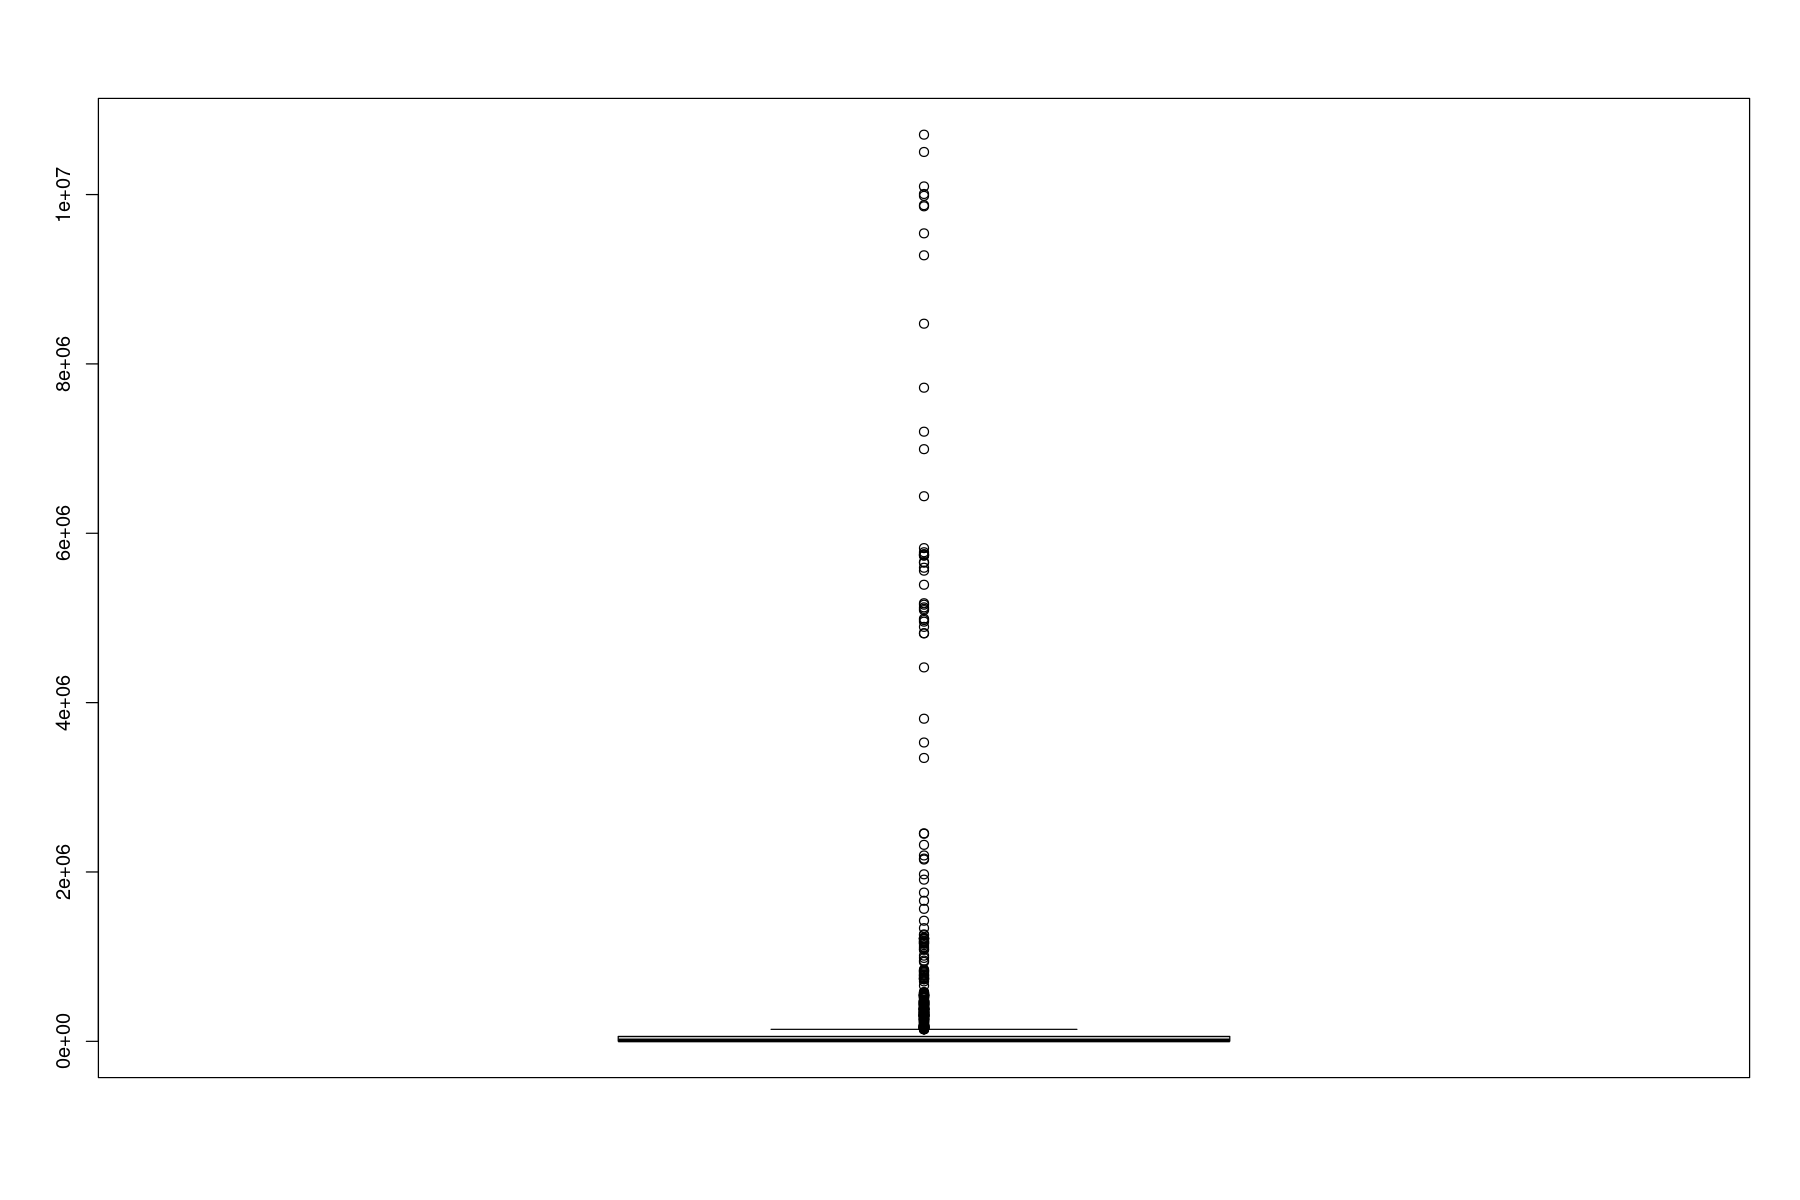

In [13]:
boxplot(df$Value_co2_emissions_kt_by_country)

In [14]:

labels = names(complete_data)

dfi = complete_data
v = list()
dfi = df[df$Var1 == velib$names[stations[i]],]
for (i in 3:18) {
    dfilabels[i] = complete_data$labels[,i]
    print(labels[i])
    v[[i]] = ggplot(complete_data) + aes(x=Year, y=labels[i] ,color=Entity) + theme(legend.position = "none")
} 
do.call(grid.arrange,c(v, ncol=4))

ERROR: Error in eval(expr, envir, enclos): objet 'velib' introuvable


In [ ]:
dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point()
}

In [ ]:

df = melt(complete_data[names(complete_data),])  #the function melt reshapes it from wide to long

p = list()
for (i in 3:18) {
    dfi = df[df$Var1 == complete_data$names[complete_data[i]],]
    p[[i]] = ggplot(dfi, aes(x=Var2, y=value)) + 
        geom_line(col="darkorchid") + 
        geom_vline(xintercept=timeTick, col="orange", linetype="dashed") +
        labs(title=complete_data$names[names(complete_data)[i]])
}
do.call(grid.arrange,p)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre dataset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

## Q5

In [ ]:
ggplot(complete_data) + aes(x=Year, y=complete_data$Value_co2_emissions_kt_by_country,color=Entity) + geom_point() + theme(legend.position = "none")

In [ ]:
sd(complete_data$Value_co2_emissions_kt_by_country)

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont :

In [ ]:
Moy = aggregate(data=complete_data,Value_co2_emissions_kt_by_country~Entity,FUN=mean)
index = order(Moy$Value_co2_emissions_kt_by_country, decreasing = TRUE )
Moy_classe = Moy[index,]
print(Moy_classe)

Grace à ce tableau, nous pouvons observer l'emission moyenne de CO2 emise par pays ( triée par ordre décroissant ).
Ainsi, nous pouvons donc observer que les 5 pays les plus émetteurs sont : Chine / Etats-Unis / Inde / Japon / Allemagne

## Q6

In [ ]:
scatterplot(data = complete_data, Value_co2_emissions_kt_by_country~Year)

## Q7

In [ ]:
data_pca = scale(complete_data[,-c(1,2)], center = TRUE, scale = TRUE)

In [ ]:
resultat_pca = PCA(data_pca)
get_eig(resultat_pca)

In [ ]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,30))

Nous pouvons en effet voir par cette ACP, que la première composante explique 28.1% des valeurs du data set.La deuxième composante, elle représente 20%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du data set. Il faudrait ajouter 5 dimensions pour avoir 80% des valeurs expliquées. Ce n'est pas forcément très efficace car à partir de la 3ème dimension, celles-ci explique entre 3.3 et 8.6%, ce qui est très faible. 

In [ ]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

Ce graphique nous donne la corrélation entre chaque point. En effet, on peut par exemple voir que la variable Value_co2_emissions_kt_by_country est bien corrélée car elle est proche de 1. Au contraire, la longitude n'est pas bine représentée, on peut pas avoir réellement confiance en ses valeurs. 
De plus, si nous comparons les variables Electricity.from.renewables et Value_co2_emissions_kt_by_country, l'angle entre les deux est très faible, ce qui signifie qu'elles sont bien corrélées en elles. A l'inverse, les variables Value_co2_emissions_kt_by_country et Renewable.energy.share.in.the.total.final.energy.consumption ont un angle quasi droit entre elles, ce qui indique qu'elles sont indépendantes.

In [ ]:
fviz_pca_ind(resultat_pca, label= "none", col.ind="cos2")

# Q9

In [16]:
numeric_data =complete_data[sapply(complete_data, is.numeric)]
mcor <- cor(numeric_data)
mcor

,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
Access.to.electricity....of.population.,1.00000000,0.87334558,-0.78404083,0.13412236,0.141985188,0.158707263,-0.15990589,0.463192819,-0.261320818,0.13354617,-0.106349792,0.44371426,0.059883311,0.07740562,0.449866903,-0.133779376
Access.to.clean.fuels.for.cooking,0.87334558,1.00000000,-0.79465634,0.10170414,0.172232070,0.135423220,-0.13665523,0.561424390,-0.194589951,0.09366203,-0.149866371,0.55445748,0.017739349,0.08276120,0.453260773,-0.126025351
Renewable.energy.share.in.the.total.final.energy.consumption....,-0.78404083,-0.79465634,1.00000000,-0.15308315,-0.159467560,-0.094132471,0.47405140,-0.438326406,0.238765957,-0.14498845,0.085547236,-0.36999340,-0.088635440,-0.06766025,-0.349024412,0.044408102
Electricity.from.fossil.fuels..TWh.,0.13412236,0.10170414,-0.15308315,1.00000000,0.644911323,0.840459649,-0.07646359,0.105614744,0.031368691,0.98984569,0.021873026,0.13133131,0.047997429,0.63627344,0.118993493,0.039013690
Electricity.from.nuclear..TWh.,0.14198519,0.17223207,-0.15946756,0.64491132,1.000000000,0.484125338,0.06225999,0.183277717,-0.014443126,0.59772835,-0.070090943,0.26557071,-0.005950463,0.47056783,0.184573241,-0.095510456
Electricity.from.renewables..TWh.,0.15870726,0.13542322,-0.09413247,0.84045965,0.484125338,1.000000000,0.08356168,0.130821893,0.007493367,0.85737528,-0.001883563,0.17125104,-0.017494080,0.73236544,0.123903311,-0.024847734
Low.carbon.electricity....electricity.,-0.15990589,-0.13665523,0.47405140,-0.07646359,0.062259995,0.083561682,1.00000000,-0.125827658,0.055378582,-0.06019979,-0.026760323,0.02707896,-0.165220234,0.04497635,-0.071616830,-0.055683914
Primary.energy.consumption.per.capita..kWh.person.,0.46319282,0.56142439,-0.43832641,0.10561474,0.183277717,0.130821893,-0.12582766,1.000000000,0.138585162,0.09544770,-0.043154227,0.71163040,0.001348422,0.11657730,0.348801674,0.048921291
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,-0.26132082,-0.19458995,0.23876596,0.03136869,-0.014443126,0.007493367,0.05537858,0.138585162,1.000000000,0.04439024,0.113404058,-0.16381019,-0.092976816,0.06322656,-0.012146126,0.120147589
Value_co2_emissions_kt_by_country,0.13354617,0.09366203,-0.14498845,0.98984569,0.597728349,0.857375284,-0.06019979,0.095447696,0.044390235,1.00000000,0.034117009,0.11255438,0.038627447,0.65782770,0.120536382,0.041251083


Ici, nous avons la matrice de corrélation entre toutes les variables de notre dataset. En effet, on peut voir que la corrélation entre la variable Year et Value_co2_emissions_kt_by_country semble faible. Sa valeur faut 0.02055306	

On voit ici que la corrélation entre les variables Year et Value_co2 est très faible. En effet, on obtient un coefficient de corélation proche de 0, ce qui montre que les deux variables ne sont pas coorélées.

In [26]:

correlation_value=cor(as.numeric(complete_data$Year), complete_data$Value_co2_emissions_kt_by_country)
print(correlation_value) # méthode pour avoir le coefficient directement 


[1] 0.02055306


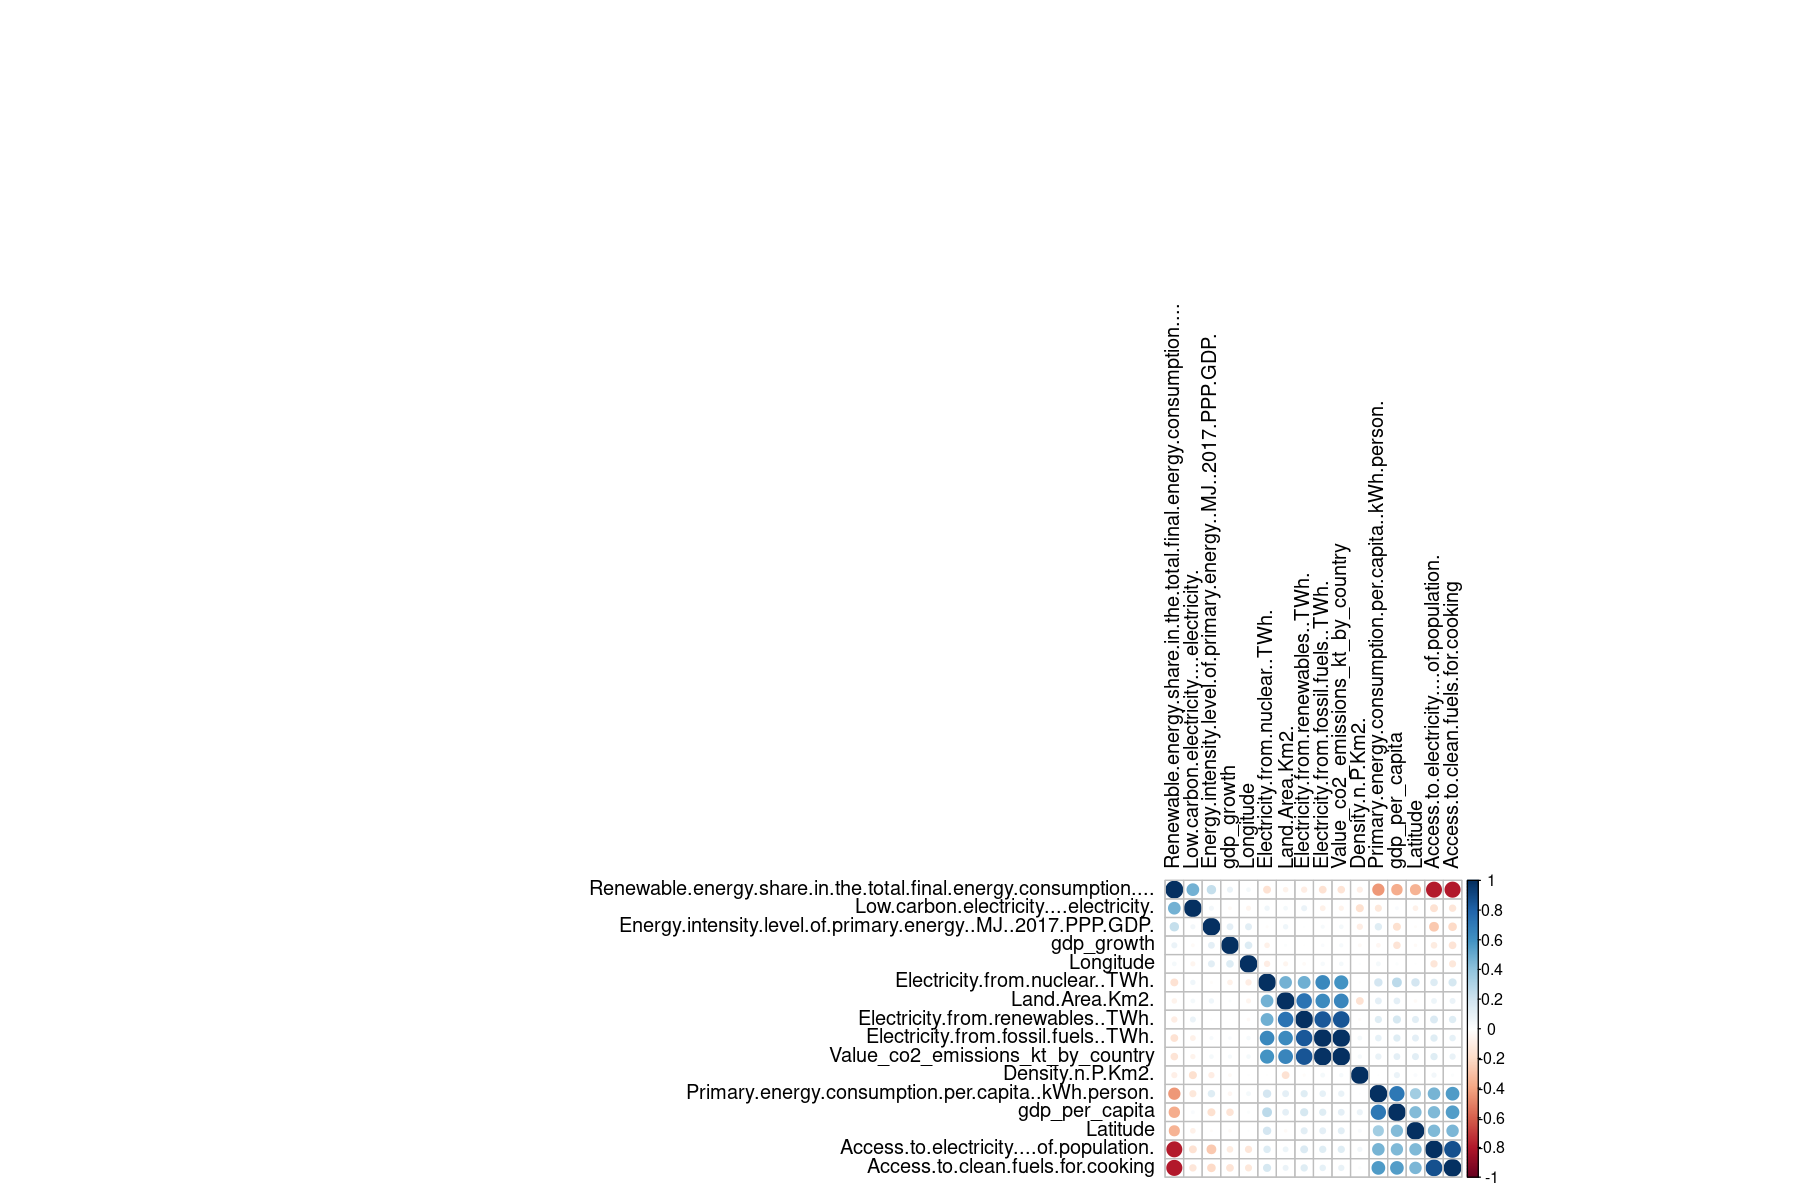

In [22]:
options(corrplot.width = 15, corrplot.height = 10)
corrplot(mcor, order="hclust", tl.col="black")

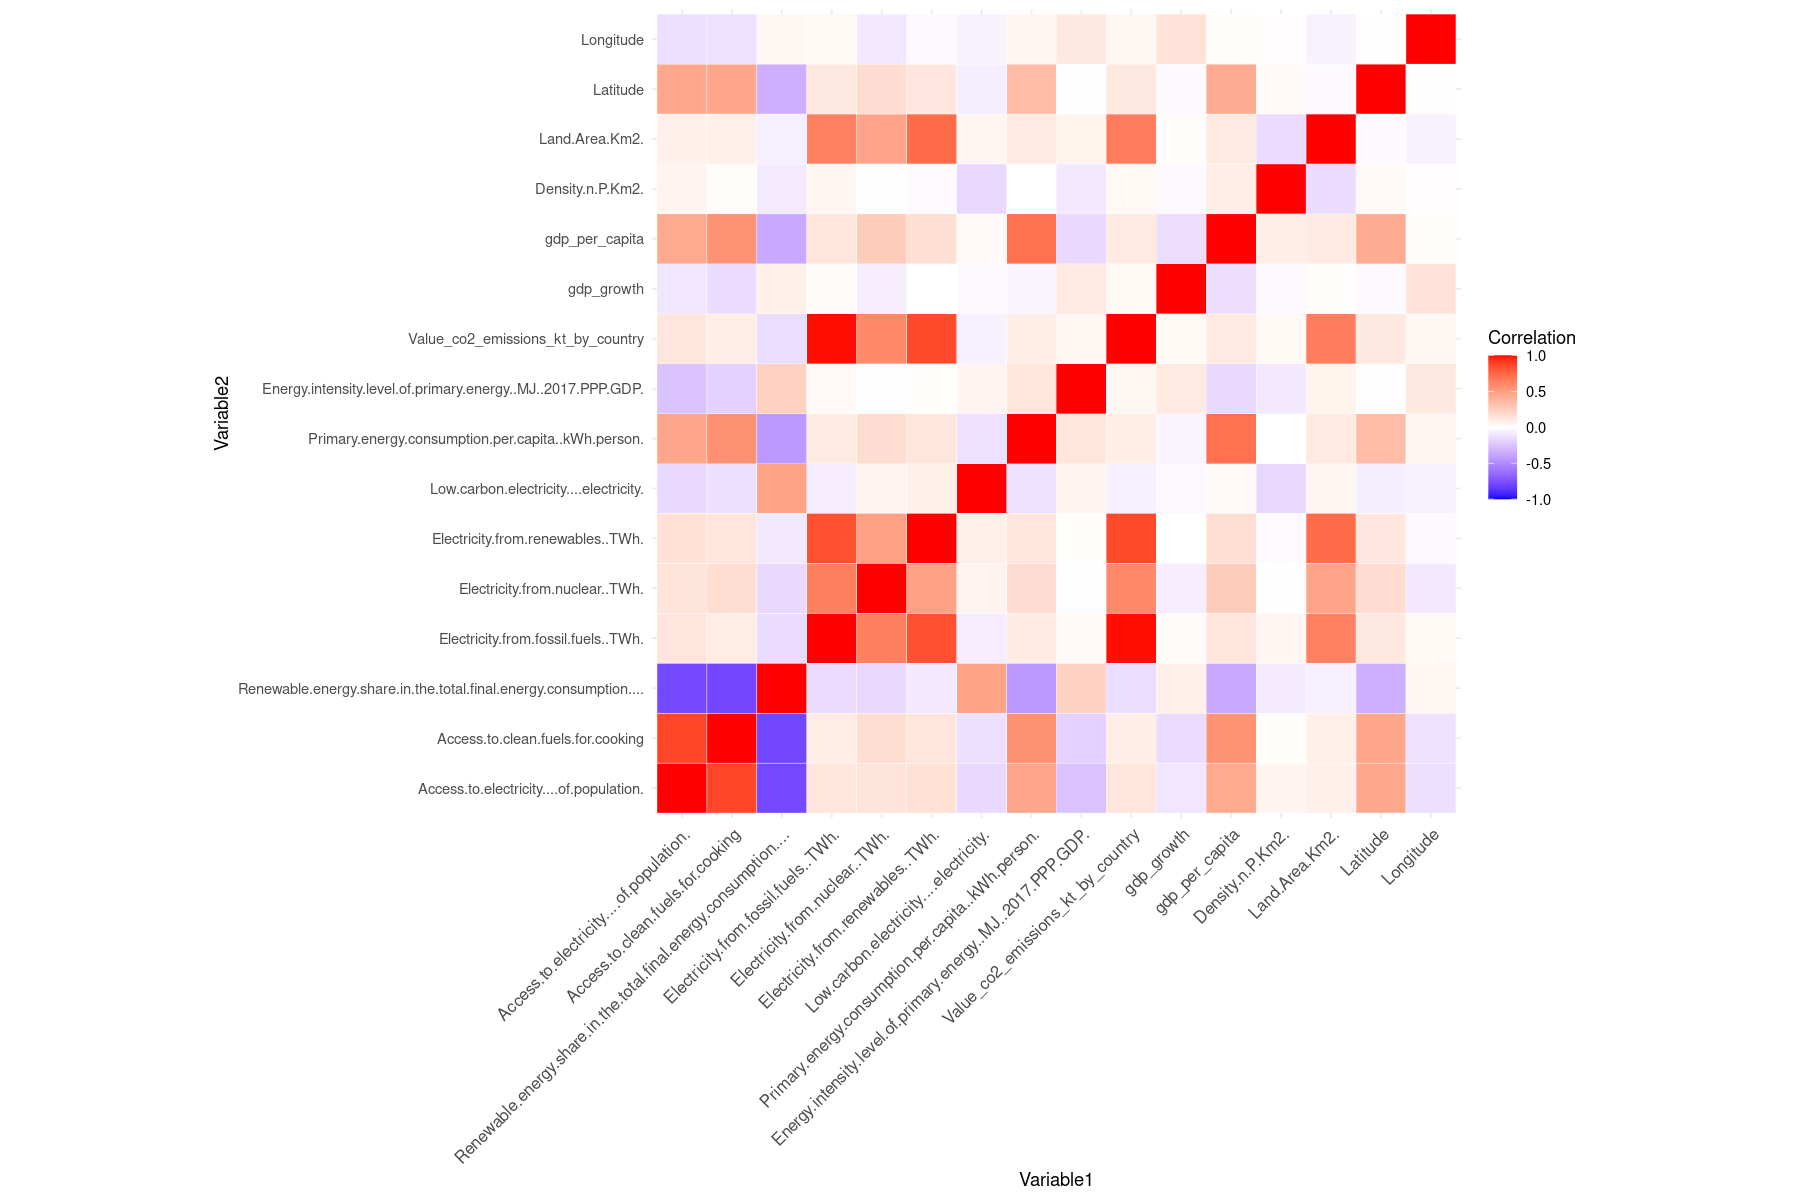

In [19]:

# Convertir la matrice en format long pour ggplot2
correlation_long <- as.data.frame(as.table(mcor))
names(correlation_long) <- c("Variable1", "Variable2", "Correlation")

# Créer un corrélogramme avec ggplot2
ggplot(correlation_long, aes(x = Variable1, y = Variable2, fill = Correlation)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limit = c(-1,1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1)) +
  coord_fixed()
